## Understanding / Cleaning the data

In [1]:
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *


/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.9.0'

In [2]:
# download the data and make the price column into floats instead of strings
Airbnb_data = pd.read_csv('listings_2.csv')
Airbnb_data['price'] = Airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# veiw the data
Airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,NaN,NaN,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.51


In [4]:
Airbnb_data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,4.905600e+04,4.905600e+04,0.0,0.0,0.0,4.905600e+04,0.0,49049.000000,49049.000000,49056.000000,...,49056.000000,37746.000000,37703.000000,37720.000000,37680.000000,37707.000000,37674.000000,37675.000000,49056.000000,38761.000000
mean,1.632664e+07,2.018121e+13,NaN,NaN,NaN,5.454690e+07,NaN,11.960835,11.960835,40.729711,...,22.156107,93.882027,9.610694,9.272508,9.747903,9.760204,9.509980,9.382747,4.767694,1.436953
std,9.219480e+06,7.902424e+00,NaN,NaN,NaN,6.338292e+07,NaN,92.219395,92.219395,0.053469,...,41.151458,8.167403,0.810319,1.056327,0.689295,0.683317,0.769628,0.874372,16.476208,1.678070
min,2.515000e+03,2.018121e+13,NaN,NaN,NaN,2.571000e+03,NaN,0.000000,0.000000,40.499794,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,8.401142e+06,2.018121e+13,NaN,NaN,NaN,6.793476e+06,NaN,1.000000,1.000000,40.691191,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.220000
50%,1.712239e+07,2.018121e+13,NaN,NaN,NaN,2.573765e+07,NaN,1.000000,1.000000,40.724337,...,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.780000
75%,2.407917e+07,2.018121e+13,NaN,NaN,NaN,8.175582e+07,NaN,2.000000,2.000000,40.763422,...,24.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.160000
max,3.056706e+07,2.018121e+13,NaN,NaN,NaN,2.293051e+08,NaN,2310.000000,2310.000000,40.911708,...,571.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,174.000000,20.330000


In [5]:
Airbnb_data.price.describe()

count    49056.000000
mean       152.330031
std        227.887173
min          0.000000
25%         70.000000
50%        110.000000
75%        179.000000
max      10000.000000
Name: price, dtype: float64

- the max value of the price is to high
- the min price should not be zero

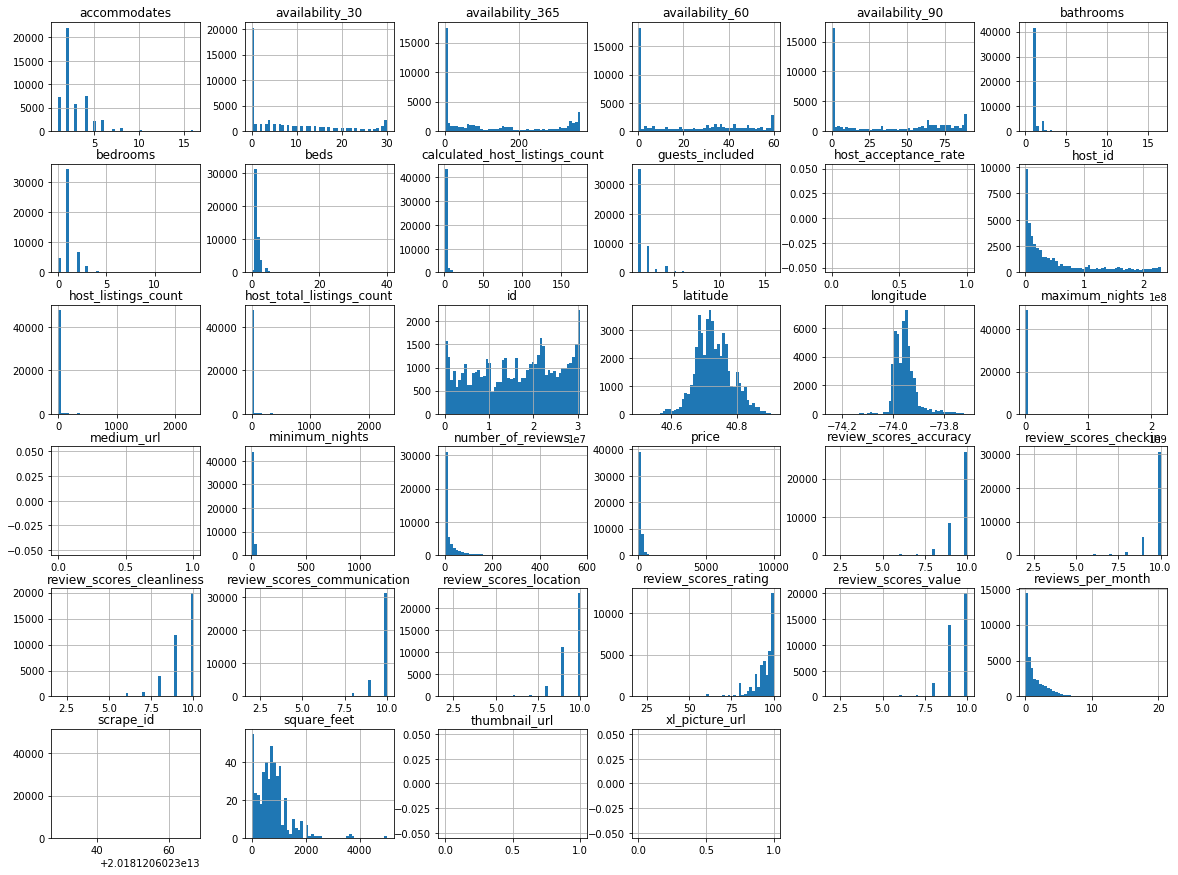

In [6]:
import matplotlib.pyplot as plt
Airbnb_data.hist(bins=50, figsize=(20,15))
plt.show()

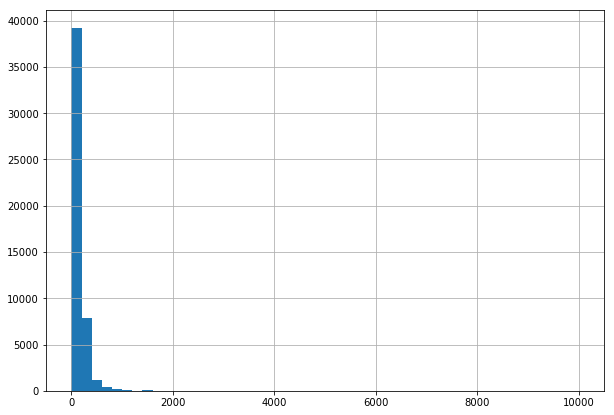

In [7]:
# view a hist of the prices
import matplotlib.pyplot as plt
Airbnb_data.price.hist(bins=50, figsize=(10,7))
plt.show()

In [8]:
# remove all listings where the price is less then 500
Airbnb_data = Airbnb_data[Airbnb_data.price < 500]

In [9]:
Airbnb_data.price.describe()

count    47813.000000
mean       131.115324
std         85.134756
min          0.000000
25%         69.000000
50%        105.000000
75%        174.000000
max        499.000000
Name: price, dtype: float64

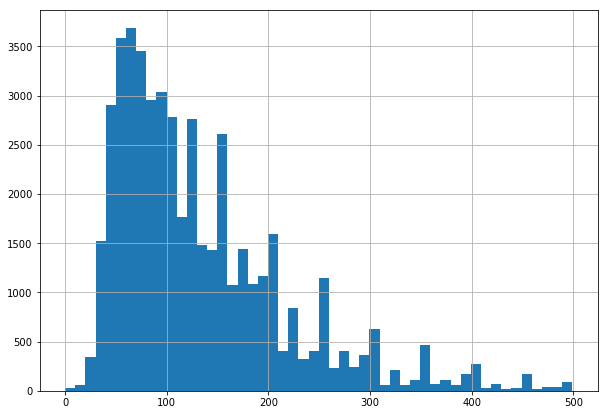

In [10]:
import matplotlib.pyplot as plt
Airbnb_data.price.hist(bins=50, figsize=(10,7))
plt.show()

In [11]:
# how many listings have a price of zero
len(Airbnb_data.loc[Airbnb_data['price'] == 0])

25

In [12]:
# if the price is less then 10 revome the listing
Airbnb_data = Airbnb_data[Airbnb_data.price > 10]

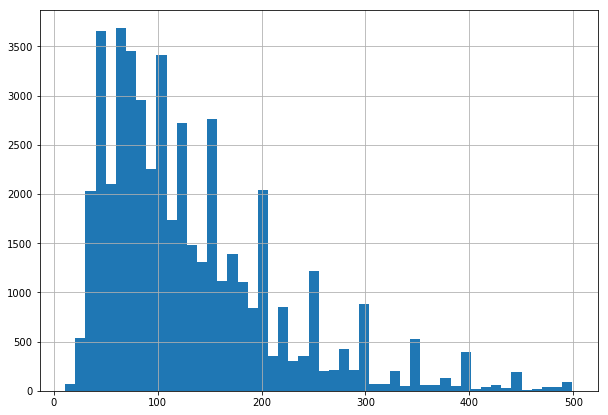

In [13]:
import matplotlib.pyplot as plt
Airbnb_data.price.hist(bins=50, figsize=(10,7))
plt.show()

- also removing listing that are not active 

In [14]:
Airbnb_data.reviews_per_month.describe()

count    37994.000000
mean         1.439136
std          1.682883
min          0.010000
25%          0.220000
50%          0.780000
75%          2.160000
max         20.330000
Name: reviews_per_month, dtype: float64

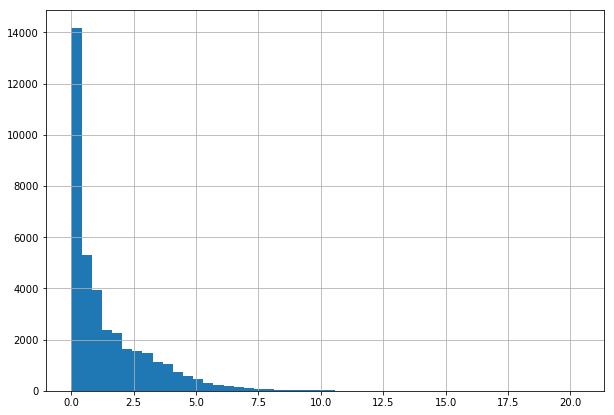

In [15]:
import matplotlib.pyplot as plt
Airbnb_data.reviews_per_month.hist(bins=50, figsize=(10,7))
plt.show()

In [16]:
# if there is not a lot of activity the listing will be droped
Airbnb_data = Airbnb_data[Airbnb_data.reviews_per_month > .12]

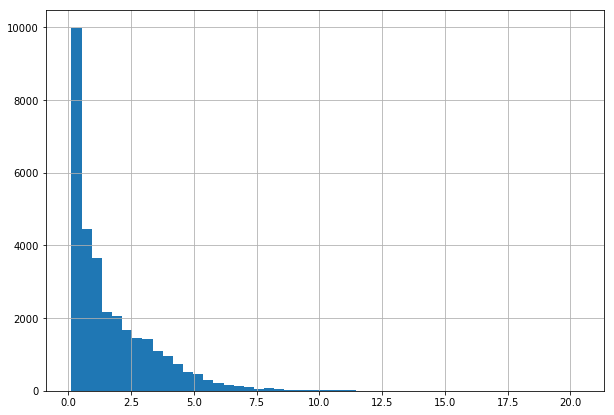

In [17]:
import matplotlib.pyplot as plt
Airbnb_data.reviews_per_month.hist(bins=50, figsize=(10,7))
plt.show()

- a heat map of the listings in NY 
    - the color represents the price 
    - the size of the circle represents the number of reviews

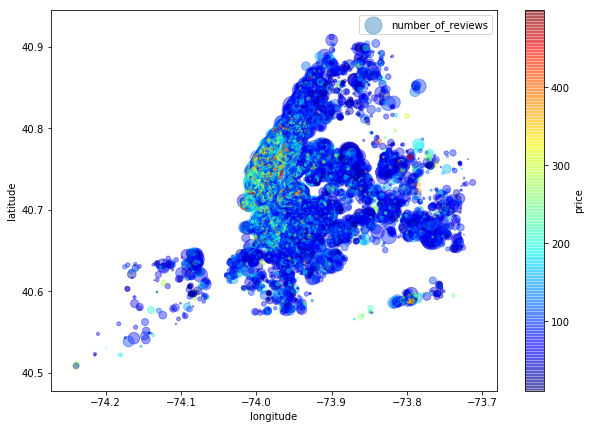

In [18]:
Airbnb_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=Airbnb_data["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [19]:
Airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31874 entries, 0 to 49037
Data columns (total 96 columns):
id                                  31874 non-null int64
listing_url                         31874 non-null object
scrape_id                           31874 non-null int64
last_scraped                        31874 non-null object
name                                31872 non-null object
summary                             30724 non-null object
space                               24499 non-null object
description                         31624 non-null object
experiences_offered                 31874 non-null object
neighborhood_overview               21729 non-null object
notes                               15179 non-null object
transit                             22622 non-null object
access                              21080 non-null object
interaction                         20560 non-null object
house_rules                         21131 non-null object
thumbnail_url          

In [20]:
# see how many pictures there are
len(Airbnb_data['picture_url'])

31874

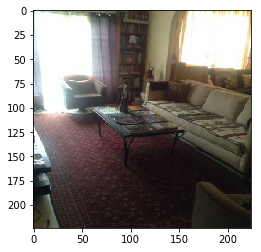

In [21]:
# view one of the images
from PIL import Image
import requests
from io import BytesIO

IMAGE_SIZE = [224,224]

response = requests.get(Airbnb_data['picture_url'][4])
img = Image.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

In [22]:
Airbnb_data.price[4]

89.0